# ANÁLISIS DE LA COMPOSICIÓN QUÍMICA DE LA ATMÓSFERA

<img src="https://www.alugalventanas.es/wp-content/uploads/2020/05/Aire-limpio-de-contaminaci%C3%B3n-ambiental.jpg" width="400" height="400" />

Los datos de la fuente que se adjunta a continuación muestran la calidad del aire en los años 2018, 2019 y 2020 mediante la concentración de NO, NO2, SO2 y O3. Se recogen datos de 13 estaciones distribuidas por la Península Ibérica y Baleares. Los valores de concentración están en $ug/m^3$.

Fuente de los datos: https://www.aemet.es/es/datos_abiertos/estadisticas/composicion_quimica_atmosfera

In [1]:
# Se importan las librerías
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Se cargan los 3 datasets obtenidos de la fuente 
df_contaminacion2020 = pd.read_csv("ecqa_2020.csv",sep = ";",encoding = 'utf-8-sig')
df_contaminacion2019 = pd.read_csv("ecqa_2019.csv",sep = ";",engine='python')
df_contaminacion2018 = pd.read_csv("ecqa_2018.csv",sep = ";",engine='python')

In [3]:
# Se crea un diccionario para mapear los códigos de las estaciones con su localización
equiv = {'ES01': 'San Pablo de los Montes (Toledo)', 'ES05': 'Noia (A Coruña)','ES06': 'Mahón (Islas Baleares)'
         ,'ES07': 'Víznar (Granada)','ES08': 'Niembro-Llanes (Asturias)'
         ,'ES09': 'Campisábalos (Guadalajara)','ES10':'Cabo de Creus (Girona)','ES11':'Barcarrota (Badajoz)'
         ,'ES12':'Zarra (Valencia)','ES13':'Peñausende (Zamora)','ES14':'Els Torms (Lleida)','ES16':'O Saviñao (Lugo)'
         ,'ES17':'Doñana (Huelva)'}

In [4]:
# Se aplica la función map y se elimina la columna código. Se crea un multi-índice con la estación y el compuesto
df_contaminacion2020["NOMBRE ESTACIÓN"] = df_contaminacion2020["CODIGO"].map(equiv)
df_contaminacion2020.drop(columns = ['CODIGO'],inplace = True)
df_contaminacion2020.set_index(['NOMBRE ESTACIÓN','VARIABLE'],inplace = True)
df_contaminacion2020[['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE','ANUAL']] = df_contaminacion2020[['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE','ANUAL']].applymap(lambda x: str(x.replace(',','.'))).astype(float)
df_contaminacion2020.columns = df_contaminacion2020.columns.str.title()

In [5]:
df_contaminacion2020

Enero  Febrero  Marzo  Abril  \
NOMBRE ESTACIÓN                  VARIABLE                                 
San Pablo de los Montes (Toledo) SO2        0.30     0.39   0.32   0.31   
                                 O3        71.00    67.00  78.00  77.00   
                                 NO         0.14     0.41   0.25   0.19   
                                 NO2        1.60     1.67   0.70   0.53   
Noia (A Coruña)                  SO2        0.68     0.63   0.89   0.72   
                                 O3        56.00    55.00  58.00  56.00   
                                 NO         0.12     0.11   0.12   0.10   
                                 NO2        4.75     4.17   2.92   3.25   
Mahón (Islas Baleares)           SO2        0.33     0.39   0.39   0.44   
                                 O3        72.00    76.00  85.00  95.00   
                                 NO         0.35     0.44   0.26   0.18   
                                 NO2        3.94     3.82   2.50   1.33   
Víznar (Granada)                 SO2        1.06     0.95   1.01   0.56   
                                 O3        71.00    77.00  80.00  76.00   
                                 NO         1.05     0.60   0.33   0.38   
                                 NO2        4.44     3.56   2.52   2.77   
Niembro-Llanes (Asturias)        SO2        0.99     0.93   0.58   0.48   
                                 O3        66.00    69.00  81.00  81.00   
                                 NO         0.59     0.67   0.37   0.47   
                                 NO2        2.51     2.32   1.67   1.53   
Campisábalos (Guadalajara)       SO2        0.59     0.55   0.68   0.85   
                                 O3        64.00    62.00  75.00  76.00   
                                 NO         0.25     0.25   0.36   0.24   
                                 NO2        1.66     2.07   3.25   1.22   
Cabo de Creus (Girona)           SO2        0.82     0.83   0.69   0.63   
                                 O3        62.00    70.00  81.00  93.00   
                                 NO         0.23     0.28   0.16   0.11   
                                 NO2        4.18     3.62   2.51   2.07   
Barcarrota (Badajoz)             SO2        0.18     0.23   0.28   0.32   
                                 O3        49.00    45.00  61.00  58.00   
                                 NO         0.12     0.13   0.13   0.09   
                                 NO2        1.14     1.23   1.41   0.79   
Zarra (Valencia)                 SO2        1.07     0.89   0.36   0.21   
                                 O3        66.00    64.00  74.00  87.00   
                                 NO         0.14     0.16   0.12   0.09   
                                 NO2        2.79     2.58   0.87   0.49   
Peñausende (Zamora)              SO2        0.16     0.16   0.29   0.19   
                                 O3        58.00    59.00  70.00  69.00   
                                 NO         0.13     0.14   0.18   0.15   
                                 NO2        1.00     0.97   0.68   0.44   
Els Torms (Lleida)               SO2        0.54     0.52   0.47   0.43   
                                 O3        47.00    63.00  75.00  80.00   
                                 NO         0.30     0.19   0.16   0.14   
                                 NO2        4.07     3.46   2.84   2.50   
O Saviñao (Lugo)                 SO2        0.69     0.70   0.64   0.72   
                                 O3        51.00    59.00  66.00  65.00   
                                 NO         0.22     0.32   0.27   0.40   
                                 NO2        2.28     3.03   2.13   3.57   
Doñana (Huelva)                  SO2        0.42     0.62   0.49   0.75   
                                 O3        43.00    50.00  70.00  75.00   
                                 NO         0.56     0.44   0.22   0.16   
                                 NO2        5.17     4.08   2.85   2

In [6]:
# Se realiza el mismo proceso para el dataset de 2019
df_contaminacion2019["NOMBRE ESTACIÓN"] = df_contaminacion2019["CODIGO"].map(equiv)
df_contaminacion2019.drop(columns = ['CODIGO'],inplace = True)
df_contaminacion2019.set_index(['NOMBRE ESTACIÓN','VARIABLE'],inplace = True)
df_contaminacion2019.fillna('0',inplace = True)
df_contaminacion2019[['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE','ANUAL']] = df_contaminacion2019[['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE','ANUAL']].applymap(lambda x: str(x.replace(',','.'))).astype(float)
df_contaminacion2019.columns = df_contaminacion2019.columns.str.title()
df_contaminacion2019

Enero  Febrero   Marzo  Abril  \
NOMBRE ESTACIÓN                  VARIABLE                                  
San Pablo de los Montes (Toledo) SO2        0.19     0.31    0.38   0.27   
                                 O3        73.00    81.00   92.00  95.00   
                                 NO         0.15     0.12    0.10   0.08   
                                 NO2        1.48     1.10    0.92   0.81   
Noia (A Coruña)                  SO2        1.15     1.19    0.98   0.85   
                                 O3        63.00    72.00   75.00  71.00   
                                 NO         0.22     0.22    0.16   0.14   
                                 NO2        2.66     3.03    3.19   4.65   
Mahón (Islas Baleares)           SO2        0.52     0.45    0.43   0.38   
                                 O3        72.00    85.00   92.00  96.00   
                                 NO         0.37     0.21    0.20   0.24   
                                 NO2        4.49     2.78    2.74   3.07   
Víznar (Granada)                 SO2        0.73     0.65    0.62   0.71   
                                 O3        74.00    82.00   91.00  98.00   
                                 NO         0.88     1.03    0.68   0.57   
                                 NO2        4.30     4.71    3.29   3.50   
Niembro-Llanes (Asturias)        SO2        0.63     1.24    0.58   0.37   
                                 O3        85.00    83.00   86.00  90.00   
                                 NO         0.49     0.88    0.36   0.24   
                                 NO2        2.97     3.25    1.78   1.70   
Campisábalos (Guadalajara)       SO2        0.92     0.68    0.37   0.22   
                                 O3        66.00    70.00   81.00  92.00   
                                 NO         0.09     0.08    0.10   0.16   
                                 NO2        1.63     2.55    2.44   2.19   
Cabo de Creus (Girona)           SO2        0.53     0.53    0.53   0.52   
                                 O3        60.00    76.00   87.00  97.00   
                                 NO         0.29     0.29    0.24   0.31   
                                 NO2        2.95     4.25    3.01   2.87   
Barcarrota (Badajoz)             SO2        0.13     0.30    0.33   0.24   
                                 O3        46.00    58.00   65.00  71.00   
                                 NO         0.16     0.19    0.33   0.36   
                                 NO2        1.53     1.27    1.67   2.27   
Zarra (Valencia)                 SO2        0.66     0.71    0.74   0.75   
                                 O3        73.00    90.00  100.00  99.00   
                                 NO         0.16     0.12    0.10   0.11   
                                 NO2        3.54     3.19    2.97   2.06   
Peñausende (Zamora)              SO2        0.26     0.32    0.34   0.25   
                                 O3        54.00    71.00   76.00  86.00   
                                 NO         0.16     0.10    0.08   0.06   
                                 NO2        2.11     1.51    1.19   0.73   
Els Torms (Lleida)               SO2        0.69     0.89    0.94   0.68   
                                 O3        55.00    74.00   88.00  91.00   
                                 NO         0.28     0.19    0.16   0.18   
                                 NO2        3.86     3.61    2.58   2.05   
O Saviñao (Lugo)                 SO2        0.60     0.55    0.61   0.52   
                                 O3        46.00    63.00   70.00  74.00   
                                 NO         0.39     0.31    0.38   0.45   
                                 NO2        3.71     2.94    2.52   1.85   
Doñana (Huelva)                  SO2        0.47     0.60    0.42   0.47   
                                 O3        48.00    59.00   70.00  80.00   
                                 NO         0.43     0.33    0.25   0.27   
               

In [7]:
# Se realiza el mismo proceso para el dataset de 2018
df_contaminacion2018["NOMBRE ESTACIÓN"] = df_contaminacion2018["ESTACIÓN"].map(equiv)
df_contaminacion2018.drop(columns = ['ESTACIÓN'],inplace = True)
df_contaminacion2018.set_index(['NOMBRE ESTACIÓN','VARIABLE'],inplace = True)
df_contaminacion2018.fillna('0',inplace = True)
df_contaminacion2018[['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE','ANUAL']] = df_contaminacion2018[['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE','ANUAL']].applymap(lambda x: str(x.replace(',','.'))).astype(float)
df_contaminacion2018.columns = df_contaminacion2018.columns.str.title()
df_contaminacion2018

Enero  Febrero  Marzo   Abril  \
NOMBRE ESTACIÓN                  VARIABLE                                  
San Pablo de los Montes (Toledo) SO2        0.15     0.17   0.15    0.22   
                                 O3        69.00    76.00  87.00   93.00   
                                 NO         0.17     0.20   0.10    0.11   
                                 NO2        1.60     1.75   0.48    0.71   
Noia (A Coruña)                  SO2        0.91     1.61   0.69    0.82   
                                 O3        64.00    68.00  72.00   78.00   
                                 NO         0.20     0.32   0.20    0.23   
                                 NO2        2.77     3.69   2.33    2.60   
Mahón (Islas Baleares)           SO2        0.41     0.48   0.49    0.41   
                                 O3        71.00    78.00  88.00  103.00   
                                 NO         0.43     0.24   0.31    0.20   
                                 NO2        4.21     3.74   3.74    2.31   
Víznar (Granada)                 SO2        0.79     0.85   0.74    0.88   
                                 O3        71.00    77.00  84.00   93.00   
                                 NO         1.47     1.04   0.43    0.31   
                                 NO2        5.17     3.96   3.83    2.81   
Niembro-Llanes (Asturias)        SO2        0.64     0.35   0.40    0.60   
                                 O3        70.00    78.00  86.00   91.00   
                                 NO         0.40     0.37   0.35    0.37   
                                 NO2        2.60     2.14   2.00    1.95   
Campisábalos (Guadalajara)       SO2        0.59     0.61   0.43    0.46   
                                 O3        62.00    66.00  78.00   77.00   
                                 NO         0.28     0.22   0.22    0.22   
                                 NO2        2.06     1.99   1.45    1.50   
Cabo de Creus (Girona)           SO2        0.48     0.43   0.41    0.43   
                                 O3        63.00    67.00  72.00   84.00   
                                 NO         0.25     0.25   0.36    0.36   
                                 NO2        3.74     4.53   4.80    4.00   
Barcarrota (Badajoz)             SO2        0.15     0.21   0.18    0.23   
                                 O3        32.00    47.00  58.00   57.00   
                                 NO         0.23     0.19   0.09    0.16   
                                 NO2        1.55     1.69   1.07    1.20   
Zarra (Valencia)                 SO2        0.64     0.46   0.35    0.52   
                                 O3        71.00    72.00  85.00   99.00   
                                 NO         0.14     0.11   0.08    0.09   
                                 NO2        2.56     3.12   1.76    2.17   
Peñausende (Zamora)              SO2        0.15     0.34   0.42    0.24   
                                 O3        55.00    65.00  82.00   81.00   
                                 NO         0.12     0.06   0.05    0.09   
                                 NO2        0.57     0.73   0.45    0.97   
Els Torms (Lleida)               SO2        0.49     0.56   0.55    0.66   
                                 O3        56.00    64.00  78.00   82.00   
                                 NO         0.16     0.14   0.12    0.13   
                                 NO2        4.20     4.90   2.55    2.78   
O Saviñao (Lugo)                 SO2        0.19     0.31   0.38    0.32   
                                 O3        54.00    62.00  79.00   80.00   
                                 NO         0.19     0.23   0.31    0.13   
                                 NO2        3.37     2.27   1.70    1.82   
Doñana (Huelva)                  SO2        0.43     0.61   0.35    0.34   
                                 O3        43.00    58.00  74.00   76.00   
                                 NO         0.33     0.26   0.06    0.10   
               

In [8]:
# # Se guardan los 3 dataframes para su representación 
# df_contaminacion2020.to_csv("Contaminación2020.csv",encoding = 'utf-8-sig')
# df_contaminacion2019.to_csv("Contaminación2019.csv",encoding = 'utf-8-sig')
# df_contaminacion2018.to_csv("Contaminación2018.csv",encoding = 'utf-8-sig')

### MAPA DE LA COMPOSICIÓN QUÍMICA DE LA ATMÓSFERA EN CADA ESTACIÓN

In [9]:
from IPython.display import IFrame
IFrame("https://app.powerbi.com/view?r=eyJrIjoiNzRjMzgyZmQtN2YzOC00NjliLWEzZDYtOWFiMmFhYTQ3YjUxIiwidCI6IjZhZmVhODVkLWMzMjMtNDI3MC1iNjlkLWE0ZmIzOTI3YzI1NCIsImMiOjl9", width=1000, height=550)

### REPRESENTACIÓN COMPOSICIÓN QUÍMICA DE LA ATMÓSFERA 

In [10]:
from IPython.display import IFrame
IFrame("https://app.powerbi.com/view?r=eyJrIjoiZTNhNTQ2ZGYtNjcxNy00OTA1LWFmMDItOWI5ZTlmMjk3YjhlIiwidCI6IjZhZmVhODVkLWMzMjMtNDI3MC1iNjlkLWE0ZmIzOTI3YzI1NCIsImMiOjl9", width=1000, height=550)

*Las dos gráficas superiores incluyen la concentración en la atmósfera por $ug/m^3$ de sustancias perjudiciales para la calidad del aire y del suelo a lo largo del 2020. Las dos gráficas inferiores hacen referencia a la evolución en la concentración de NO2 y O3 en % durante los diferentes meses del año 2020.*

Para ver el análisis desarrollado acudir a : https://datacrop.es/reto-analisis-1/

### COMPARACIÓN PRODUCCIÓN FRENTE A VALORES DE O3 Y NO2 EN LA ATMÓSFERA

In [11]:
# Leer dataset de producción
df_produccion = pd.read_csv("Datos_produccion.csv", encoding = 'utf-8-sig')

In [12]:
# Realizar la suma de producción por año
df_total = pd.Series(df_produccion.sum(axis = 0))
df_total

Cultivos                       TOTAL PATATASCOLESESPARRAGOSLECHUGA/ESC./ENDIV...
Producción 2018 (toneladas)                                             26179100
Producción 2019 (toneladas)                                             26082400
Producción 2020 (toneladas)                                             25631300
Porcentaje % respecto 2019                                                3334.5
dtype: object

In [13]:
# Se cogen los valores de producción de 2018-2019-2020 y se crea la columna fecha
df_total = pd.DataFrame(df_total.values[1:4])
df_total['Fecha'] = ['2018','2019','2020']

In [14]:
# Se crea el dataframe de contaminación 2020 agrupando por variable y cogiendo el máximo valor
df_contaminacion2020.reset_index(inplace = True)
df_ctotal2020 = pd.DataFrame(df_contaminacion2020.groupby('VARIABLE')['Anual'].max()).transpose()
df_ctotal2020

VARIABLE,NO,NO2,O3,SO2
Anual,0.67,4.21,80.0,1.11


In [15]:
# Mismo proceso con el 2019
df_contaminacion2019.reset_index(inplace = True)
df_ctotal2019 = pd.DataFrame(df_contaminacion2019.groupby('VARIABLE')['Anual'].max()).transpose()
df_ctotal2019

VARIABLE,NO,NO2,O3,SO2
Anual,0.76,3.95,89.0,0.95


In [16]:
# Mismo proceso con el 2018
df_contaminacion2018.reset_index(inplace = True)
df_ctotal2018 = pd.DataFrame(df_contaminacion2018.groupby('VARIABLE')['Anual'].max()).transpose()
df_ctotal2018

VARIABLE,NO,NO2,O3,SO2
Anual,0.74,3.97,88.0,1.16


In [17]:
# Dataframe final con los 3 años
df_ctotal = pd.concat([df_ctotal2018, df_ctotal2019, df_ctotal2020])
df_ctotal['Fecha'] = ['2018','2019','2020']
df_ctotal

VARIABLE,NO,NO2,O3,SO2,Fecha
Anual,0.74,3.97,88.0,1.16,2018
Anual,0.76,3.95,89.0,0.95,2019
Anual,0.67,4.21,80.0,1.11,2020


In [18]:
# Se juntan el dataframe de producción y el de composición atmosférica por el campo fecha
# Se pasan los valores a float
df_prod_atm = df_ctotal.merge(df_total, on = 'Fecha')
df_prod_atm.set_index('Fecha', inplace=True)
df_prod_atm.rename(columns = {0:'Producción'},inplace=True)
df_prod_atm['Producción'] = df_prod_atm['Producción'].astype(float)
df_prod_atm

,NO,NO2,O3,SO2,Producción
Fecha,,,,,
2018,0.74,3.97,88.0,1.16,26179100.0
2019,0.76,3.95,89.0,0.95,26082400.0
2020,0.67,4.21,80.0,1.11,25631300.0


In [19]:
# Se estudia la correlación de los diferentes compuestos químicos con la producción
corr = df_prod_atm.corr()
corr

,NO,NO2,O3,SO2,Producción
NO,1.000000,-0.989644,0.993770,-0.485463,0.928908
NO2,-0.989644,1.000000,-0.999476,0.354939,-0.972444
O3,0.993770,-0.999476,1.000000,-0.385004,0.964392
SO2,-0.485463,0.354939,-0.385004,1.000000,-0.127203
Producción,0.928908,-0.972444,0.964392,-0.127203,1.000000


Text(0.5, 1.0, 'Correlación de la producción con la contaminación')

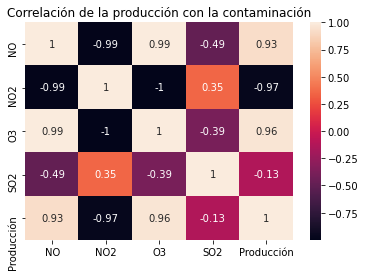

In [20]:
# Se crea un heatmap con la correlación para visualizarlo mejor
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True).set_title("Correlación de la producción con la contaminación")

*Esta imagen representa la un heatmap con la matriz de correlación, donde se observa que valores como el NO2 están inversamente relacionados con la producción, al igual que el S02. Sin embargo, el O3 es directamente proporcional a la producción anual. Si bien es cierto que se han utilizado únicamente 3 años de datos (volumen muy pequeño), se puede inferir que la composición atmosférica debería ser otra variable a tener en cuenta para las predicciones de producción.*

Para ver el análisis desarrollado acudir a: https://datacrop.es/reto-analisis-1/